In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.feature_selection import f_regression, SelectKBest

In [7]:
#Charger les données
df = pd.read_csv('../Data/insurance.csv')

In [19]:
# Afficher les informations de base
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Dataset info:")
df.info()

print("Summary statistics:")
print(df.describe())


Dataset shape: (1338, 7)
Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.87390

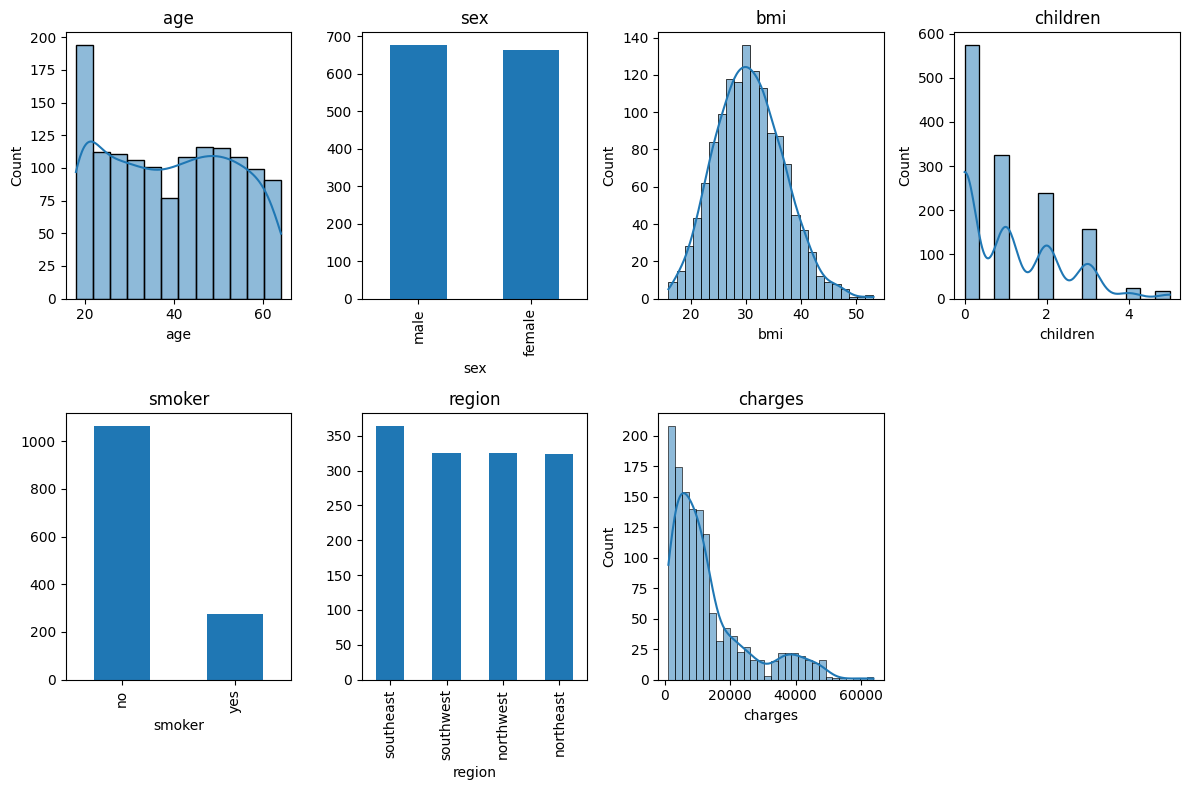

In [9]:
# Visualiser les distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar')
    else:
        sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
#Préparer les données
numeric_features = df.select_dtypes(include=[np.number]).columns
X = df[numeric_features].drop('charges', axis=1)
y = df['charges']

# Sélectionner les 3 meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)

Selected features: ['age', 'bmi', 'children']


In [11]:
# Appliquer la standardisation
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[selected_features] = scaler.fit_transform(df[selected_features])

In [12]:
# Créer et entraîner le modèle
X = df_scaled[selected_features]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

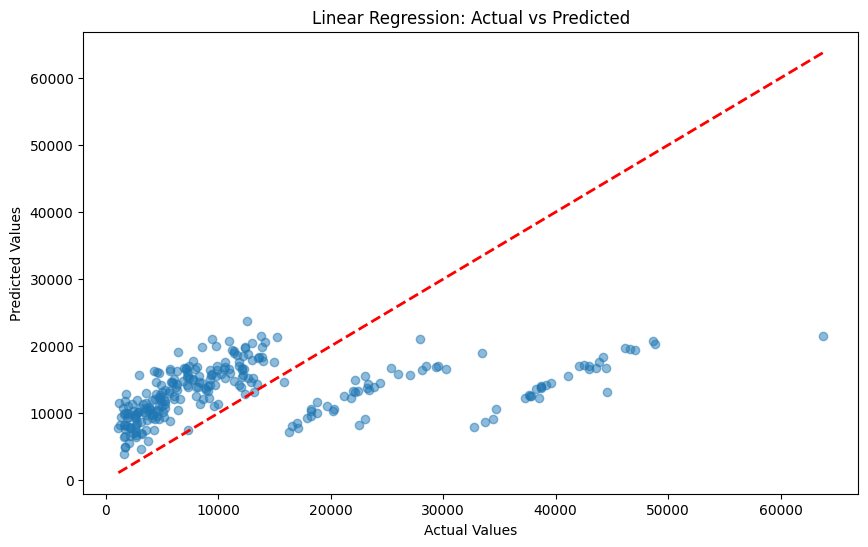

In [22]:
#Visualisation des resultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [23]:
#Evaluation du modele
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'EMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 131201335.65
EMSE: 11454.32
MAE: 9181.31
